In [1]:
# In this Python tutorial we start with a continuous function of time from
# which we draw samples at a uniform sampling rate.  The sampling rate is
# chosen to be higher than the maximum appreciable frequency component
# contained in the original function of time.  We then attempted to
# reconstruct the original continuous function from the sampled data.
import numpy as np
import matplotlib.pyplot as plt

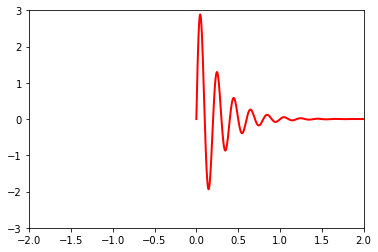

In [2]:
# Here's the original function from which samples will be drawn.
ts0 = np.linspace(0, 2.5, 1000)
T = 0.2
tau = 0.25
A = 3.5
f = A*np.sin(2*np.pi*ts0/T)*np.exp(-ts0/tau)
plt.plot(ts0,f, 'r-', linewidth = 2)
plt.axis((-2, 2, -3, 3));

In [3]:
# Now do the sampling.  There are Ns samples between -tmax and +tamx.
# Therefore the time between samples is 2*tmax/(Ns - 1), or the sample
# frequency is (Ns - 1)/(2*tmax).
Ns = 1001
tmax = 10
ts = np.linspace(-tmax, tmax, Ns)
ys = A*np.sin(2*np.pi*ts/T)*np.exp(-ts/tau)
for i in range(Ns):
    if ts[i] < 0:
        ys[i]= 0

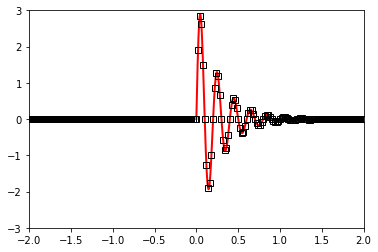

In [4]:
# Plot the samples on top of the original continuous function.

# Original function.
plt.plot(ts0,f, 'r-', linewidth = 2)
plt.axis((-2, 2, -3, 3))

# Add the samples.
plt.plot(ts, ys, 'ks', fillstyle = 'none');

In [5]:
# Here again are the sampling period and frequency.
Ts = ts[2] - ts[1]
fs = 1/Ts
Ts, fs

(0.019999999999999574, 50.000000000001066)

In [6]:
# Define a function of t.  This function will become our reconstructed signal.
# The reconstrcution will be done using the sinc function!
def yRe(t):
    z = 0
    for i in range(-int((Ns-1)/2), int((Ns-1)/2), 1):
        n = int(i + (Ns-1)/2 + 1)
        z += ys[n]*np.sin(np.pi*fs*(t - i*Ts))/(np.pi*fs*(t - i*Ts))
    return z

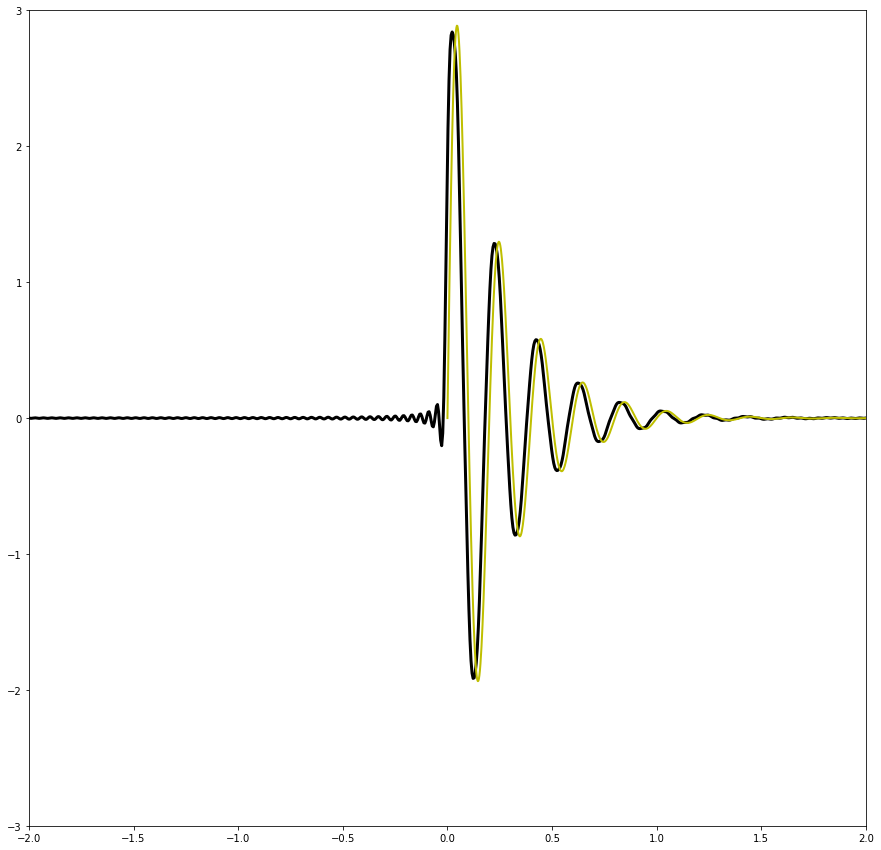

In [7]:
# Now make some time values and plot the reconstructed signal (black line)
# along with the origonal continuous function (yellow line).
plt.figure(figsize=(15,15))
tt = np.linspace(-2.5, 2.5, 1000)
plt.plot(tt, yRe(tt), 'k-', linewidth = 3)
plt.plot(ts0, f, 'y-', linewidth = 2)
plt.axis((-2, 2, -3, 3));